# Experiment 2

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("outputs/exp2_cores_8_5/data.csv")
# df = pd.read_csv("outputs/exp2_cores_8_300/data.csv")
# df = pd.read_csv("outputs/exp2_cores_8_300/data190.csv")
df = pd.read_csv("outputs/exp2_cores_8_300/data104.csv")
df.keys()

Index(['i_sample', 'n_cores', 'step', 'method', 'execution_time'], dtype='object')

In [15]:
df

,i_sample,n_cores,step,method,execution_time
0,1,2,1,1,0.806468
1,1,2,1,2,0.417168
2,1,2,1,3,0.335776
3,1,2,2,1,0.000716
4,1,2,2,2,0.033531
...,...,...,...,...,...
6502,104,4,2,2,0.105930
6503,104,4,2,3,0.086383
6504,104,4,3,1,0.000450
6505,104,4,3,2,0.450962


## General Statistics

### Statistics

In [16]:
mean_times = df.groupby(['step', 'method', 'n_cores'])['execution_time'].mean().reset_index()
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')
table

n_cores            2          4          8         12        16        20  \
step method                                                                 
1    1       0.571147   0.628765   0.605102  0.592577  0.570513  0.568962   
     2       0.383998   0.267383   0.277518  0.306400  0.340582  0.400360   
     3       0.373373   0.254473   0.281544  0.305962  0.352179  0.390710   
2    1       0.000706   0.000684   0.000697  0.000643  0.000619  0.000570   
     2       0.071019   0.095493   0.143500  0.182315  0.224203  0.264376   
     3       0.068929   0.094408   0.140097  0.178589  0.220638  0.261688   
3    1       1.164048   9.765843  10.038486  6.264139  4.638155  1.753466   
     2       2.809936  12.427363   7.076589  4.195425  3.324022  2.308344   
     3       2.885936  12.401982   7.122059  4.578796  3.585708  2.321809   

n_cores             24  
step method             
1    1        0.562491  
     2        0.422039  
     3        0.421853  
2    1        0.000533  
     2        0.293594  
     3        0.292822  
3    1       13.992229  
     2        7.057978  
     3        7.371403

In [17]:
import pandas as pd

# Calcular tiempos medios de ejecución agrupados por step, method y n_cores
mean_times = df.groupby(['step', 'method', 'n_cores'])['execution_time'].mean().reset_index()

# Ordenar y pivotar la tabla para que las columnas correspondan a n_cores
mean_times = mean_times.sort_values(by=['step', 'method', 'n_cores'])
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')

# Convertir el índice en columnas y renombrar para la presentación
table_reset = table.reset_index().rename(columns={'step': 'Stage', 'method': 'Method'})

# Lista de columnas: las dos primeras son Stage y Method, el resto son los valores de n_cores
cols = table_reset.columns.tolist()
n_core_cols = len(cols) - 2

# Definir el formato de columnas para LaTeX: "c" para Stage, "l" para Method y "r" para cada columna de n_cores
col_format = "c|l|" + "r|" * n_core_cols
col_format = col_format.rstrip("|")

# Construir la cadena LaTeX
latex_str = "\\begin{tabular}{" + col_format + "}\n\\hline\n"
latex_str += " &  & \\multicolumn{" + str(n_core_cols) + "}{c}{\\textbf{\\# of Cores}} \\\\ \\hline\n"
latex_str += "{\\bf Stage} & {\\bf Method} " + " & ".join([f"{{\\bf {col}}}" for col in cols[2:]]) + " \\\\ \\hline\n"

# Agrupar por Stage para combinar las celdas correspondientes
grouped = table_reset.groupby("Stage")
for stage, group in grouped:
    n_rows = group.shape[0]
    first = True
    for _, row in group.iterrows():
        # Para la primera fila del grupo, se usa multirow para el Stage
        stage_cell = f"\\multirow{{{n_rows}}}{{*}}{{Step {int(stage)}}}" if first else ""
        first = False
        row_line = f"{stage_cell} & {row['Method']}"
        # Para cada columna de n_cores se formatea el valor con 4 decimales y se añade "s" (segundos)
        for col in cols[2:]:
            val = row[col]
            cell = f"{val:.4f}s" if not pd.isna(val) else "--"
            row_line += " & " + cell
        row_line += " \\\\"
        latex_str += row_line + "\n"
    latex_str += "\\hline\n"
latex_str += "\\end{tabular}"

print(latex_str)


\begin{tabular}{c|l|r|r|r|r|r|r|r}
\hline
 &  & \multicolumn{7}{c}{\textbf{\# of Cores}} \\ \hline
{\bf Stage} & {\bf Method} {\bf 2} & {\bf 4} & {\bf 8} & {\bf 12} & {\bf 16} & {\bf 20} & {\bf 24} \\ \hline
\multirow{3}{*}{Step 1} & 1.0 & 0.5711s & 0.6288s & 0.6051s & 0.5926s & 0.5705s & 0.5690s & 0.5625s \\
 & 2.0 & 0.3840s & 0.2674s & 0.2775s & 0.3064s & 0.3406s & 0.4004s & 0.4220s \\
 & 3.0 & 0.3734s & 0.2545s & 0.2815s & 0.3060s & 0.3522s & 0.3907s & 0.4219s \\
\hline
\multirow{3}{*}{Step 2} & 1.0 & 0.0007s & 0.0007s & 0.0007s & 0.0006s & 0.0006s & 0.0006s & 0.0005s \\
 & 2.0 & 0.0710s & 0.0955s & 0.1435s & 0.1823s & 0.2242s & 0.2644s & 0.2936s \\
 & 3.0 & 0.0689s & 0.0944s & 0.1401s & 0.1786s & 0.2206s & 0.2617s & 0.2928s \\
\hline
\multirow{3}{*}{Step 3} & 1.0 & 1.1640s & 9.7658s & 10.0385s & 6.2641s & 4.6382s & 1.7535s & 13.9922s \\
 & 2.0 & 2.8099s & 12.4274s & 7.0766s & 4.1954s & 3.3240s & 2.3083s & 7.0580s \\
 & 3.0 & 2.8859s & 12.4020s & 7.1221s & 4.5788s & 3.5857s & 2.3218

### Boxplots and Violin Plots

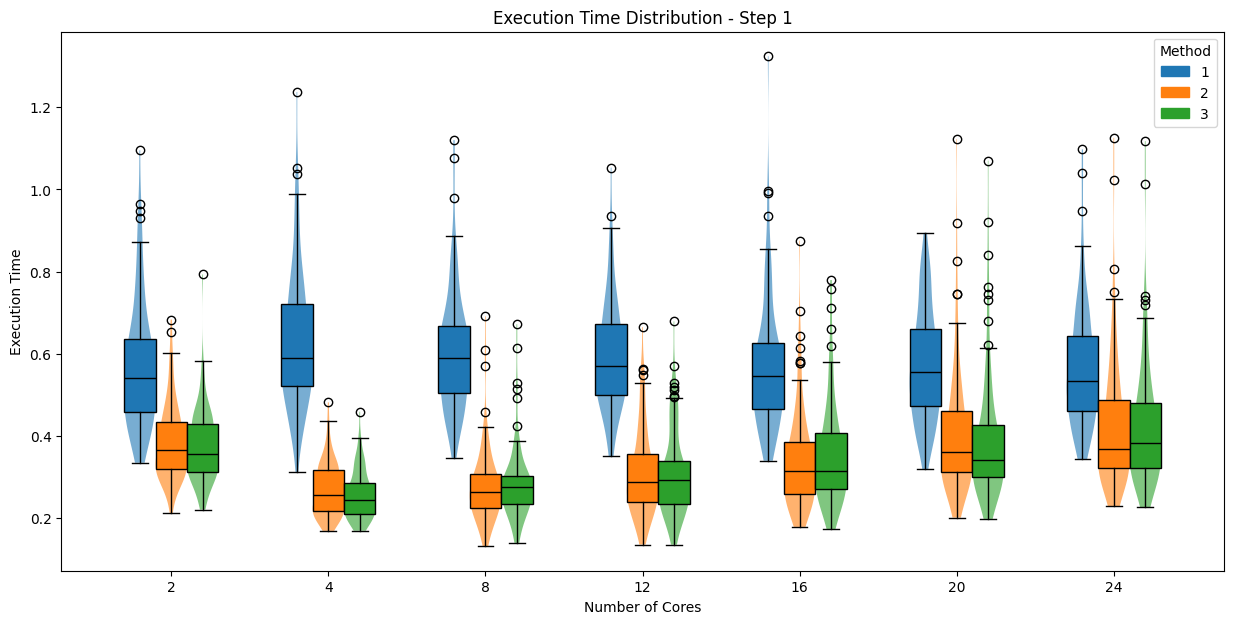

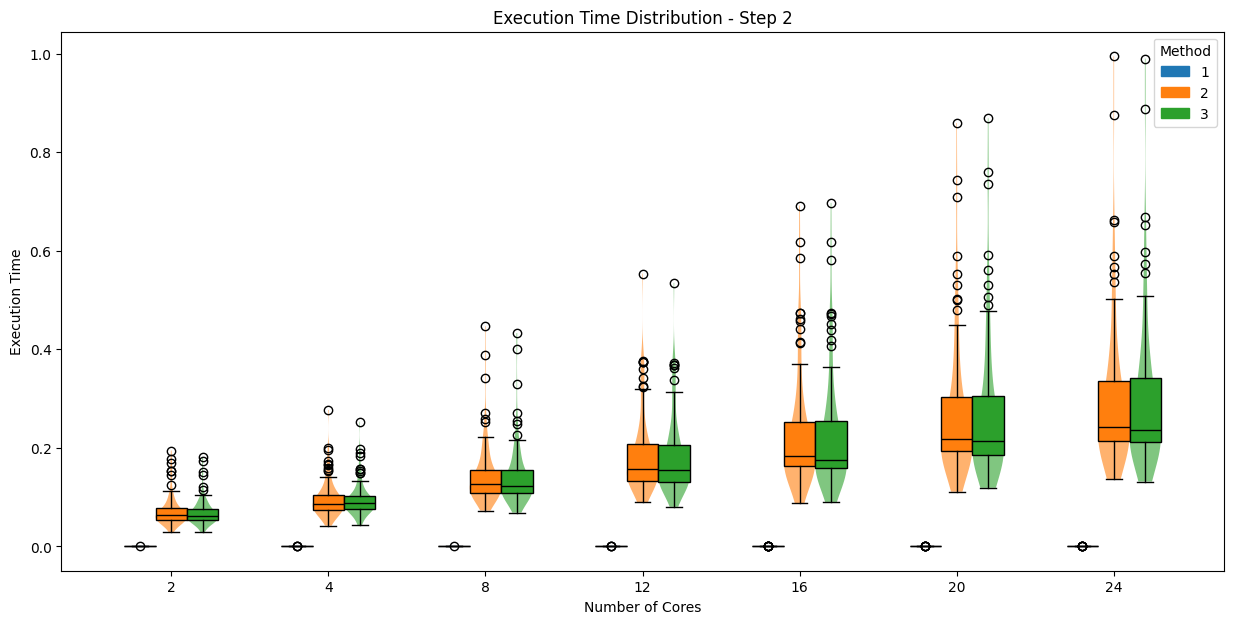

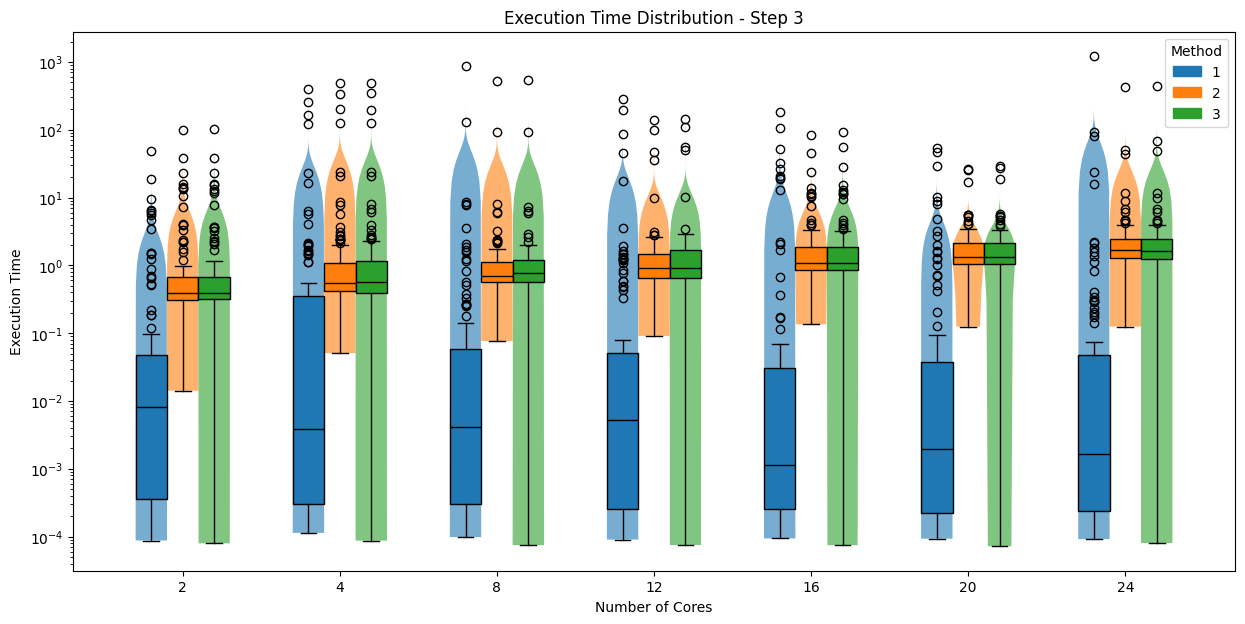

In [18]:
# Unique values for steps and methods
steps = sorted(df['step'].unique())
methods = df['method'].unique()
n_cores_values = sorted(df['n_cores'].unique())

# Plot boxplots and violin plots
for step in steps:
    fig, ax = plt.subplots(figsize=(15, 7))
    positions = np.arange(len(n_cores_values))  # Posiciones en el eje X para cada valor de n_cores
    width = 0.2  # Ancho de cada caja/violin

    # Boxplots para cada método
    for i, method in enumerate(methods):
        data = [
            df[(df['step'] == step) & (df['method'] == method) & (df['n_cores'] == n)]
            ['execution_time'].dropna()
            for n in n_cores_values
        ]
        ax.boxplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            patch_artist=True,
            boxprops=dict(facecolor=f"C{i}"),
            medianprops=dict(color='black')
        )

    # Violin plots para cada método
    for i, method in enumerate(methods):
        data = [
            df[(df['step'] == step) & (df['method'] == method) & (df['n_cores'] == n)]
            ['execution_time'].dropna().values
            for n in n_cores_values
        ]
        parts = ax.violinplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            showmeans=False,
            showextrema=False,
            showmedians=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(f"C{i}")
            pc.set_alpha(0.6)

    ax.set_xticks(positions)
    ax.set_xticklabels(n_cores_values)
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Execution Time")
    ax.set_title(f"Execution Time Distribution - Step {step}")
    ax.legend(
        [plt.Rectangle((0, 0), 1, 1, color=f"C{i}") for i in range(len(methods))],
        methods,
        title="Method"
    )

    # Para el step 2, usar escala logarítmica en el eje Y
    if step == 3:
        ax.set_yscale('log')

    plt.show()


### Histograms

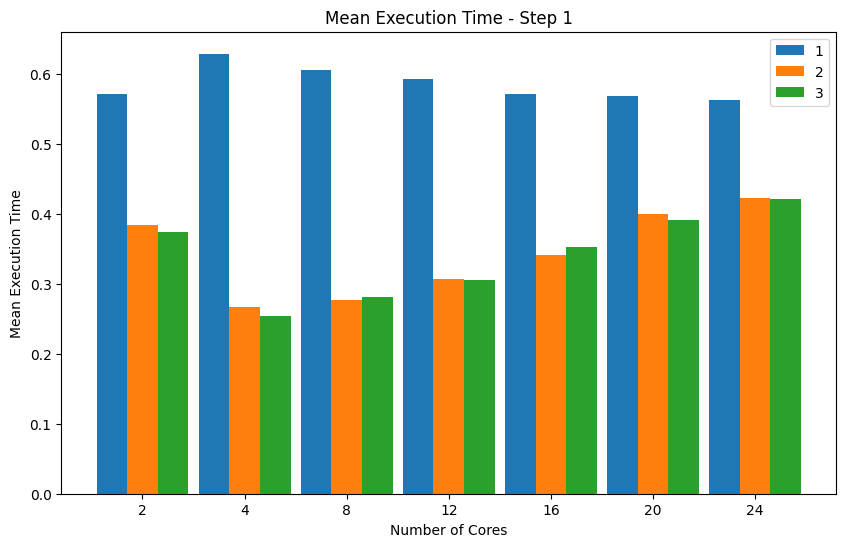

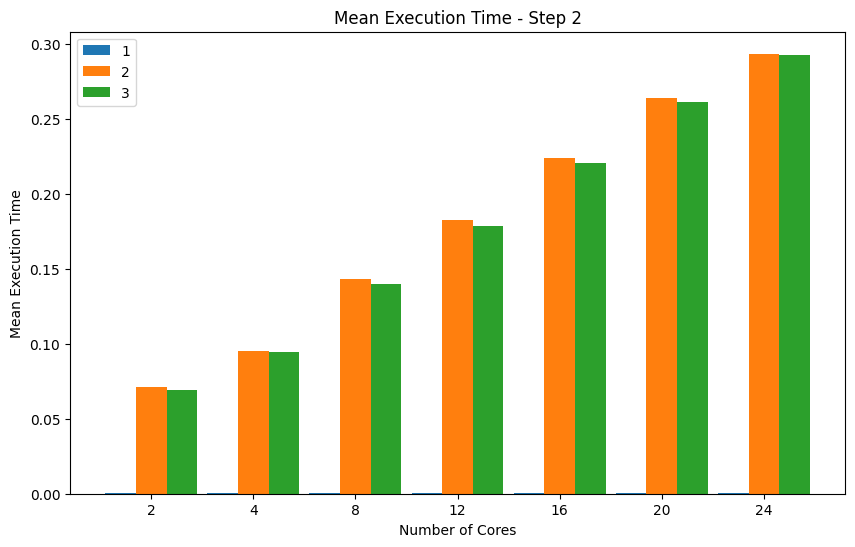

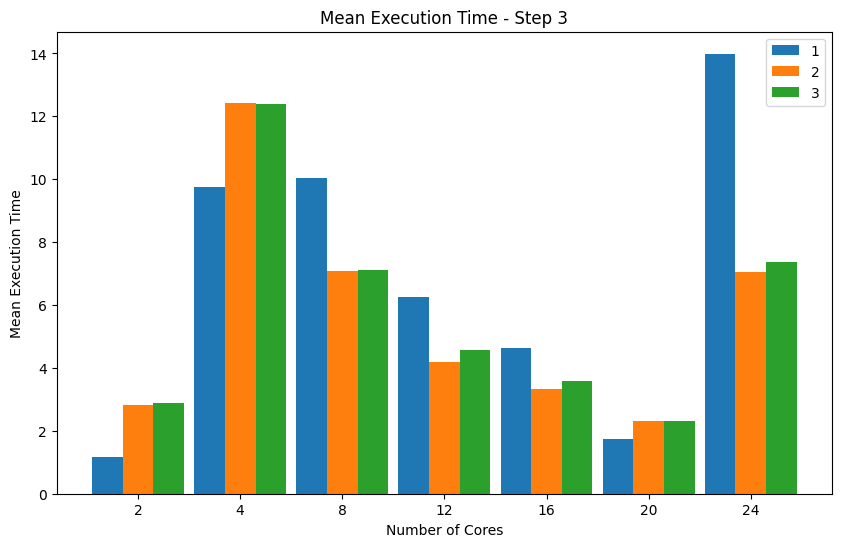

In [19]:
# Crear boxplots y violin plots para los tiempos de ejecución agrupados por step y method
unique_steps = df['step'].unique()
unique_methods = df['method'].unique()
unique_n_cores = sorted(df['n_cores'].unique())

# Crear histogramas para los tiempos de ejecución promedio por step
for step in unique_steps:
    fig, ax = plt.subplots(figsize=(10, 6))
    data_step = mean_times[mean_times['step'] == step]

    width = 0.3  # Ancho de cada barra
    positions = np.arange(len(unique_n_cores))

    for i, method in enumerate(unique_methods):
        means = [
            data_step[
                (data_step['n_cores'] == n) & (data_step['method'] == method)
            ]['execution_time'].values[0]
            if not data_step[(data_step['n_cores'] == n) & (data_step['method'] == method)].empty
            else 0
            for n in unique_n_cores
        ]
        ax.bar(positions + i * width, means, width=width, label=method, color=f"C{i}")

    ax.set_xticks(positions + width)
    ax.set_xticklabels(unique_n_cores)
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Mean Execution Time")
    ax.set_title(f"Mean Execution Time - Step {step}")
    ax.legend()
    plt.show()

